In [0]:
import pandas as pd
import numpy as np 
from sklearn import tree

In [6]:
df= pd.read_csv(r"Tour_Plan.csv")
df

,Source,Destination,Distance,Sports,Ticket_fare/ Fuel Price,Accomodation,Service,Days,Budget,Above_budget,car,Bike,Train,Bus
0,Ernakulam,Goa,767,1,6000,1,1,6,"15,000",No,1,0,0,0
1,Selum,Goa,792,0,9000,0,1,10,"30,000",Yes,0,1,0,0
2,Hyderabad,Goa,646,1,1500,1,0,7,"12,000",No,0,0,0,1
3,Guntur,Goa,911,1,2000,0,1,4,"10,000",Yes,0,0,0,0
4,Bangalore,Goa,584,0,1200,1,1,6,"10,000",No,0,0,1,0
5,Mumbai,Goa,585,0,6000,1,1,5,"18,000",Yes,1,0,0,0
6,Thiruvananthapuram,Goa,975,0,1600,1,1,8,"20,000",No,0,0,0,1


In [7]:
df.columns

Index(['Source ', 'Destination', 'Distance', 'Sports',
       'Ticket_fare/ Fuel Price', 'Accomodation', 'Service', 'Days ', 'Budget',
       'Above_budget', 'car ', 'Bike', 'Train', 'Bus'],
      dtype='object')

In [0]:
#X = df[['Source','Destination','Distance','Travel','Ticket_fare/ Fuel Price','Accomodation','Service','Days','Budget']]
Y = df['Above_budget']
X= df.drop(['Above_budget','Source ','Destination','Budget'],axis=1)

In [9]:
df.dtypes

Source                     object
Destination                object
Distance                    int64
Sports                      int64
Ticket_fare/ Fuel Price     int64
Accomodation                int64
Service                     int64
Days                        int64
Budget                     object
Above_budget               object
car                         int64
Bike                        int64
Train                       int64
Bus                         int64
dtype: object

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y) 

[Text(111.60000000000001, 190.26, 'X[2] <= 1800.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(167.4, 135.9, 'X[6] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.20000000000002, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

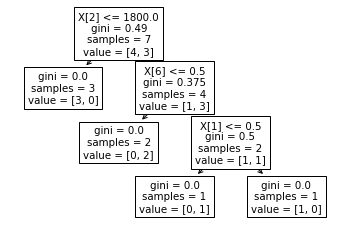

In [11]:
tree.plot_tree(clf) 

In [0]:
import graphviz 

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("Tour")

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Distance', 'Sports','Ticket_fare/ Fuel Price', 'Accomodation', 'Service', 'Days ', 'car ', 'Bike', 'Train', 'Bus'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
graph

In [18]:
graph.write_png("Tree.png")

True